In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import SelectShapeStd

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

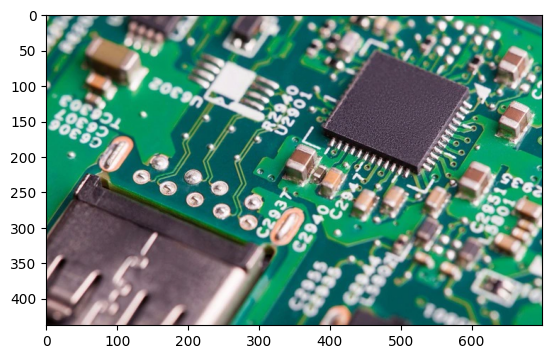

In [2]:
img = cv2.imread("images/chip3.png")
showC(img)

## **Cac phep bien doi anh**

* Affine Transformaton
* Perfective Transfrom
* Polar transformation

# **Affine Transformation**
<h3> 1. Translation </h3>
<img src="images/2.png" alt="Alternative text" width = "800" height="350" />

<h3> 2. Shear </h3>
<img src="images/3.png" alt="Alternative text" width = "800" height="380" />

<h3> 3. Scaling </h3>
<img src="images/4.png" alt="Alternative text" width = "800" height="380" />

<h3> 4. Rotation </h3>
<img src="images/6.png" alt="Alternative text" width = "800" height="380" />

<h3> 5. Flip </h3>

<h3> 6. Reflection </h3>

## Translation

[[  1.   0.  20.]
 [  0.   1. 100.]]


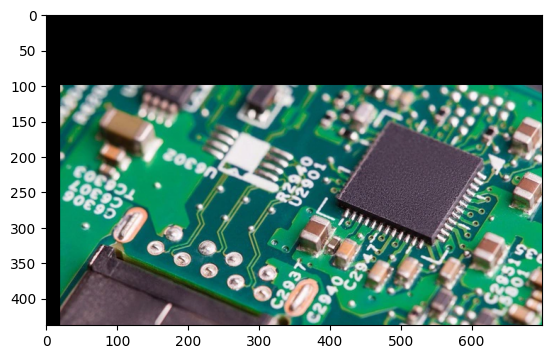

In [3]:
t_x = 20
t_y = 100
M = np.array([
    [1 ,0 ,t_x ],
    [0 ,1 ,t_y ]
], dtype  = np.float32)
print(M )

img_translated = cv2.warpAffine(img, M, (img.shape[1],img.shape[0]))
showC(img_translated)

## Scale 

[[2. 0. 0.]
 [0. 2. 0.]]


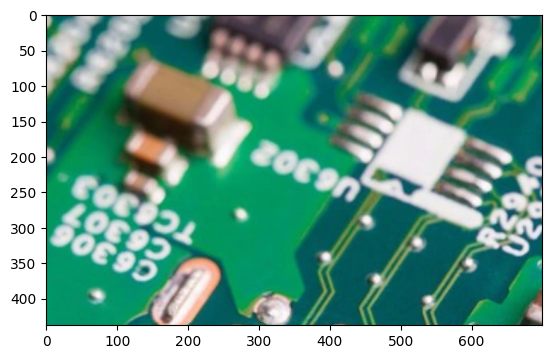

In [4]:
t_x = 0
t_y = 0
scale_x = 2 
scale_y = 2 
M = np.array([
    [scale_x ,0 ,t_x ],
    [0 ,scale_y ,t_y ]
], dtype  = np.float32)
print(M )

img_translated = cv2.warpAffine(img, M, (img.shape[1],img.shape[0]))
showC(img_translated)

## Shear

[[1.  0.1 0. ]
 [0.1 1.  0. ]]


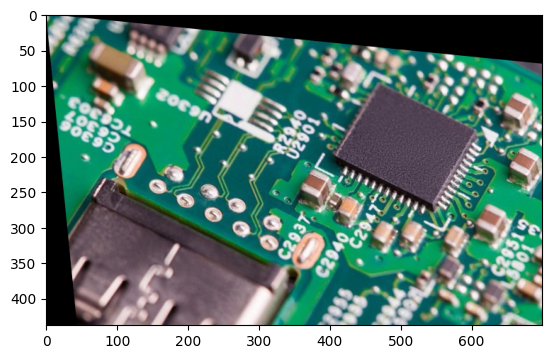

In [5]:
t_x = 0
t_y = 0
scale_x = 1
scale_y = 1  

m_x = 0.1
m_y = 0.1

M = np.array([
    [scale_x ,m_x ,t_x ],
    [m_y ,scale_y ,t_y ]
], dtype  = np.float32)
print(M )

img_translated = cv2.warpAffine(img, M, (img.shape[1],img.shape[0]))
showC(img_translated)

## Rotation

In [6]:
math.radians(45)

0.7853981633974483

[[ 0.70710677  0.70710677  0.        ]
 [-0.70710677  0.70710677  0.        ]]


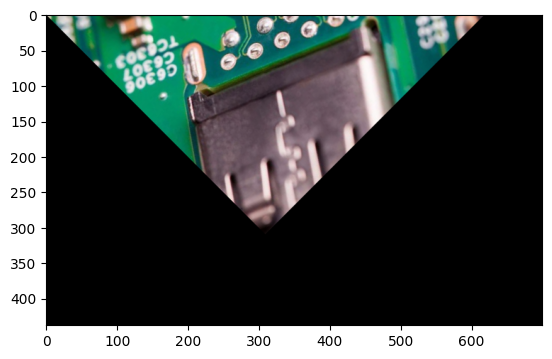

In [7]:
angle = math.radians(45)
center = (img.shape[1] // 2, img.shape[0] // 2)
t_x = 0
t_y = 0

M = np.array([
    [math.cos(angle)  ,math.sin(angle) ,t_x ],
    [-math.sin(angle) ,math.cos(angle) ,t_y ]
], dtype  = np.float32)
print(M )

img_translated = cv2.warpAffine(img, M, (img.shape[1],img.shape[0]))
showC(img_translated)

[[  0.70710678   0.70710678 -84.73567748]
 [ -0.70710678   0.70710678 429.42997821]]


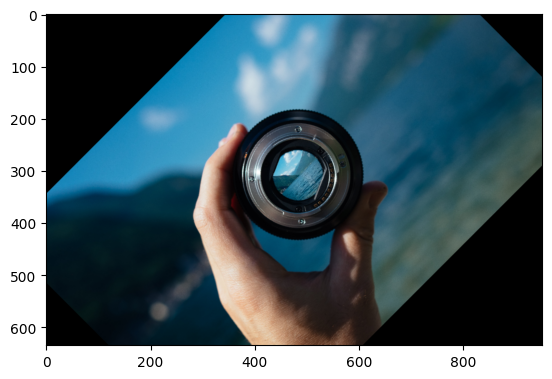

In [19]:
angle = 45
## Matrix này có tâm của phép xoay chính là tâm của bức ảnh 
matrix = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), angle, 1)

print(matrix)
rotated_image = cv2.warpAffine(img, matrix, (img.shape[1], img.shape[0]))
showC(rotated_image)

# **Perspective Transformation**
* Trong phep bien doi Perspective Transform thi a31,a32 la cac tham so thu nho boi canh
<h3> Perfective Transformation </h3>
<img src="images/10.png" alt="Alternative text" width = "400" height="350" />

<h3></h3>
<img src="images/hbXD7.png" alt="Alternative text" width = "800" height="380" />

<h3></h3>
<img src="images/407L1.png" alt="Alternative text" width = "800" height="380" />

# **Difference between Affine Transformation and Perspective Transformation**

<h3></h3>
<img src="images/9.png" alt="Alternative text" width = "800" height="380" />

# **Polar Transformation**

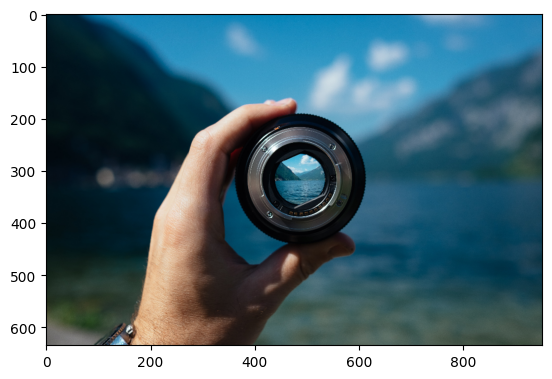

In [8]:
img = cv2.imread("images/lens.png")
showC(img)

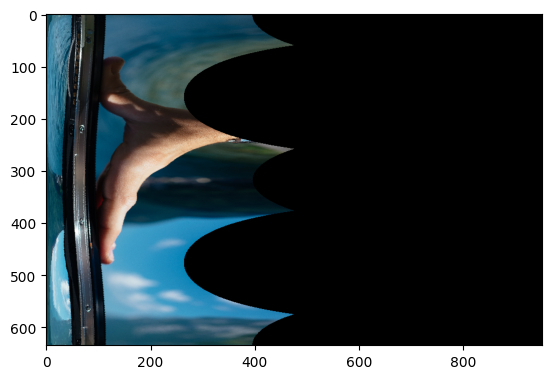

In [9]:

center = (int(img.shape[1] /2), int(img.shape[0] /2))
max_radius = math.sqrt(img.shape[1]**2 + img.shape[0]**2)

polar = cv2.linearPolar(img,center,max_radius, cv2.WARP_FILL_OUTLIERS)
showC(polar)

index:8


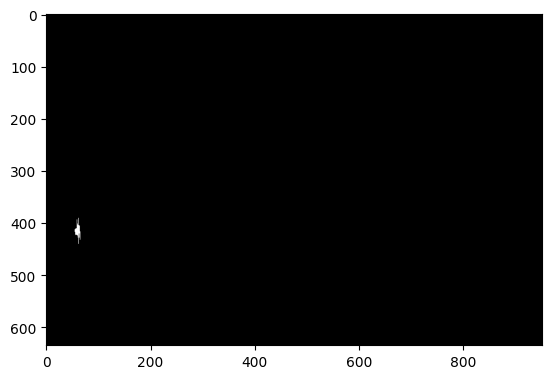

In [10]:
from function import SelectShapeStd, ClosingCircle, ClosingRectangle

gray =cv2.cvtColor(polar, cv2.COLOR_BGR2GRAY) 
_, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
closing_circle = ClosingCircle(threshold, 1)
closing_rectangle = ClosingRectangle(closing_circle, 1, 11)

biggest = SelectShapeStd(closing_rectangle, mode="area")
show(biggest)

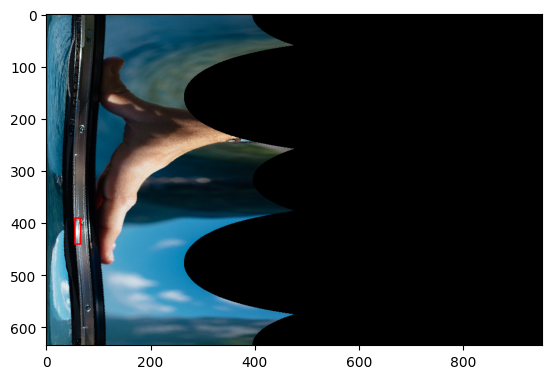

In [11]:
x,y,w,h = cv2.boundingRect(biggest)
polar_copy = polar.copy()
cv2.rectangle(polar_copy, (x,y), (x+w, y+h), (0,0,255),2)
showC(polar_copy)

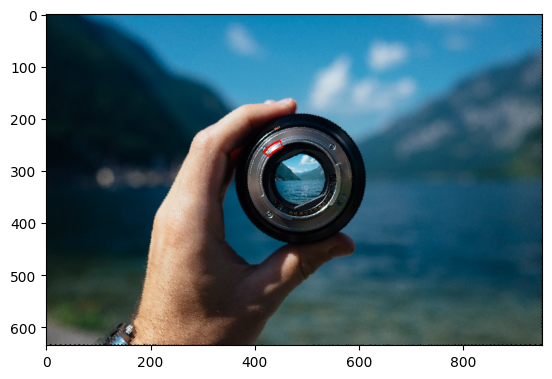

In [12]:
polar_invert = cv2.linearPolar(polar_copy,center,max_radius, cv2.WARP_INVERSE_MAP)
showC(polar_invert)

index:4


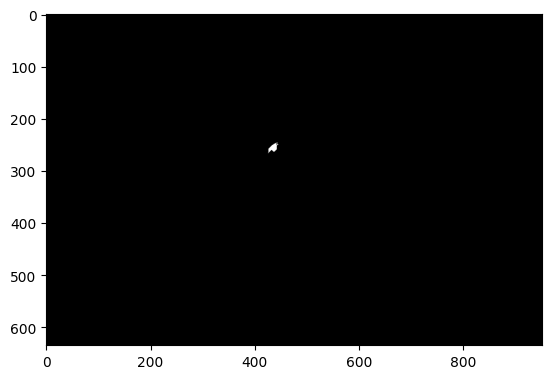

In [13]:
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
_, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
closing_circle = ClosingCircle(threshold, 1)
closing_rectangle = ClosingRectangle(closing_circle, 1, 11)

biggest = SelectShapeStd(closing_rectangle, mode="area")
show(biggest)

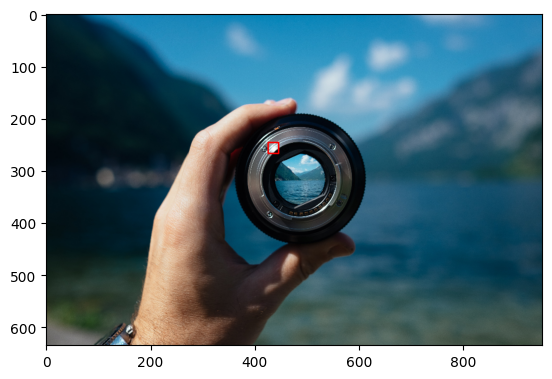

In [14]:
x,y,w,h = cv2.boundingRect(biggest)
img_copy = img.copy()
cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,0,255),2)
showC(img_copy)